In [1]:
import sys
sys.path.append('..')
from Experiment import Experiment

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Alanine Dipeptide

In water, at 300K using the OPLS-AA force field, the mfpt for transitions in Alanine Dipeptide are given as follows:
- $C7_{eq} \rightarrow \alpha_R$, 259 $ps$
- $\alpha_R \rightarrow C7_{eq}$, 27 $ps$
- $\beta/C5 \rightarrow \alpha_R$, 293 $ps$
- $\alpha_R \rightarrow \beta/C5$, 29 $ps$
- $\alpha_R \rightarrow C7_{ax}$, 11 $ns$
- $C7_{ax} \rightarrow \alpha_R$, 224 $ps$

REF: https://pubs.acs.org/doi/full/10.1021/jp048540w (2004)

## 5us NPT Trajectory

1bar NPT simulation, T = 300K. Amber force field. <- Search for papers which match this forcefield. Forcefield family.

In [2]:
exp = Experiment(location='../exp/outputs/alanine_dipeptide/5us_NPT_alanine', features=['dihedrals','sidechain_torsions', 'carbon_alpha'])

Successfully initialised metadata.
3 PDB files found in the given directory:
[1] ../exp/outputs/alanine_dipeptide/5us_NPT_alanine/minimised.pdb
[2] ../exp/outputs/alanine_dipeptide/5us_NPT_alanine/top_1ps.pdb
[3] ../exp/outputs/alanine_dipeptide/5us_NPT_alanine/topology_nw.pdb
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 2 features.


In [36]:
exp.get_features()

['PHI 0 ALA 2', 'PSI 0 ALA 2']

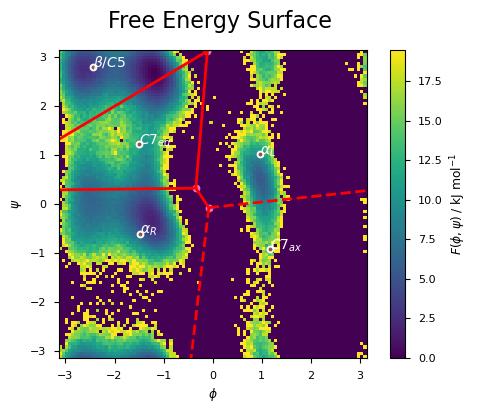

(<Figure size 600x400 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>)

In [37]:
exp.free_energy_plot(features=['PHI 0 ALA 2', 'PSI 0 ALA 2'], feature_nicknames=['\phi', '\psi'], landmark_points={r'$C7_{eq}$':(-1.507, 1.22), r'$\beta \slash C5$': (-2.44, 2.79), r'$\alpha_R$': (-1.484, -0.611), r'$\alpha_L$': (0.960, 1.012), r'$C7_{ax}$': (1.169, -0.925)})

KMeans iterations: 100%|██████████| 31/31 [00:03<00:00,  8.63it/s] 


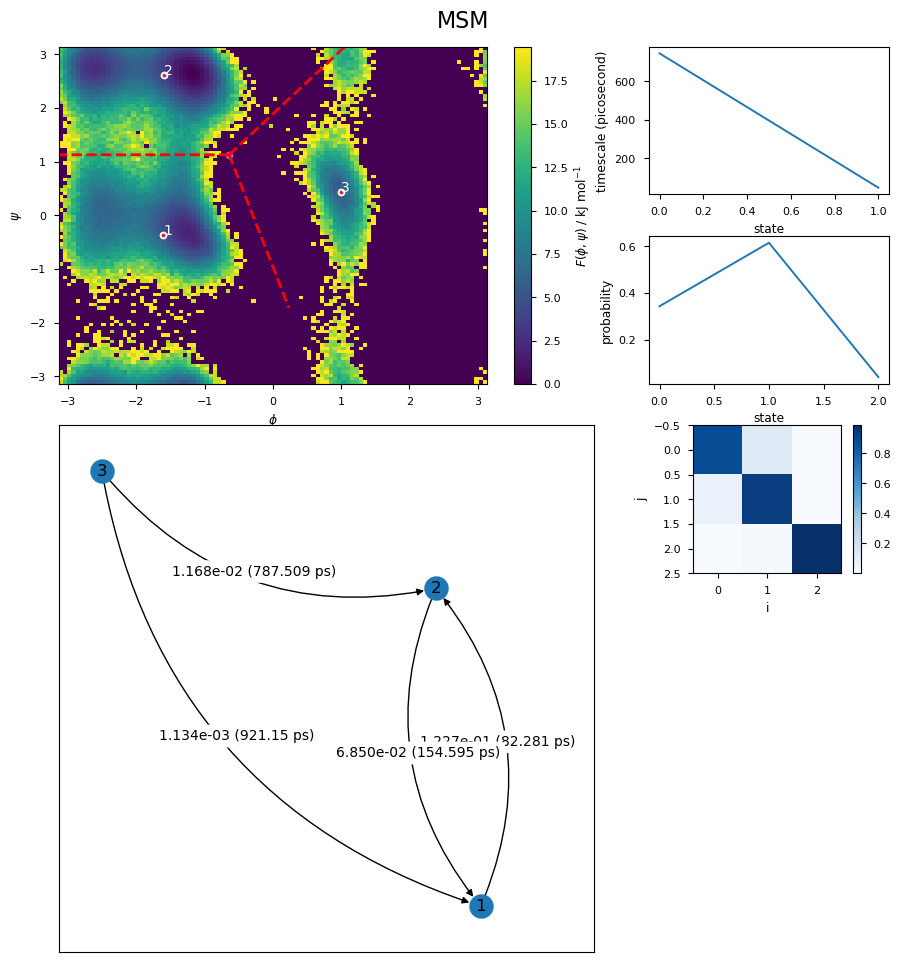

In [39]:
exp.markov_state_model(n_clusters=3, lagtime='10ps', features=['PHI 0 ALA 2', 'PSI 0 ALA 2'], feature_nicknames=['\phi', '\psi'], threshold_probability=1e-3)

# Chignolin

System information:
- A small protein consisting of 10 amino acids, with sequence GYDPETGTWG.
- System size: 137 atoms, 1337 water molecules, two Na+ ions
- The system is *not* capped, and so for charge balance we require the Na+ ions
- In previous studies, the system has been observed to have a folding time of around $0.6 \mu s$ and an unfolding time of around $2.2 \mu s$: https://pubmed.ncbi.nlm.nih.gov/22034434/ (2011)
- As with most polypeptides, there are two highly flexible dihedral angles per residue, ϕ and ψ (in proline, only the ψ angle can truly rotate, and the N-terminal and C-terminal residues only have one flexible dihedral angle). 
- In previous studies, it has been remarked that it is the rotation of the dihedral angles of the glycine 7 residue that govern a transition of chignolin between an unfolded and folded configuration. These therefore form the collective variables of this system.

Notes on experiments:
- **exp_NPT**: A 5us NPT simulation of chignolin under standard conditions (300K, 1bar). The initial structure was a hydrated version of the 1uao chignolin structure from the PDB (https://www.ebi.ac.uk/pdbe/entry/pdb/1uao/protein/1). 


NVT and capped experiments were also run. The system size constraint of NVT led to an unphysical trajectory that was over-constrained. The capped 

In [3]:
from Experiment import Experiment
exp_DESRES = Experiment(location="/home/dominic/PycharmProjects/CV_learning/exp/outputs/chignolin/desres/DESRES-Trajectory_CLN025-0-protein/CLN025-0-protein", features=["dihedrals", "carbon_alpha", "sidechain_torsions"])
#exp_NPT = Experiment(location='../exp/outputs/chignolin/5us_NPT_chignolin_1uao', features=['dihedrals'])
exp_NVT_340 = Experiment(location='../exp/outputs/chignolin/5us_NVT_340K_chignolin_1uao', features=['dihedrals'])
#exp_70ns_NPT_800K = Experiment(location='../exp/outputs/chignolin/70ns_NPT_800K_chignolin', features=['dihedrals'])
contact_threshold = 0.5
times = None

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.


/home/dominic/miniconda3/envs/diffusion/lib/python3.9/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


Successfully featurized trajectory with 63 features.
Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 18 features.


## Comparing DESRes 106us Trajectory with 5us NPT Trajectory

### Technical Details of Experiments:
- Force field: CHARMM22 (DESRes), Amber (NPT)
- Temperature: 340K (DESRes), 300K (NPT)
- Solvation: tip3p (DESRes), tip3p (NPT)
- #Water Molecules: 9250 (DESRes), 1337 (NPT)
- Unit cell dimensions: (39.6nm)^3 (DESRes), (26.7nm)^3 (NPT) 
- Timestep: 2.5fs (DESRes), 2fs (NPT)
- Length: 106us (DESRes), 5us (NPT)
- Constant pressure: No (DESRes), Yes - 1 bar (NPT)

### Comparing Implied Timescales

100%|██████████| 99/99 [01:17<00:00,  1.28it/s]


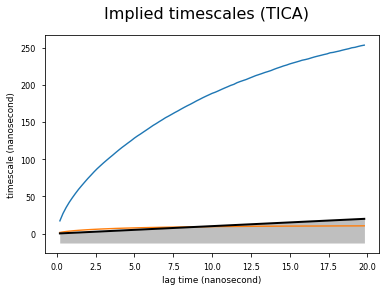

In [7]:
exp_DESRES.implied_timescale_analysis(max_lag='20ns', increment=1, yscale='linear')

In [10]:
exp_DESRES.featurizer.describe()

['PHI 0 TYR 2',
 'PSI 0 TYR 1',
 'PHI 0 ASP 3',
 'PSI 0 TYR 2',
 'PHI 0 PRO 4',
 'PSI 0 ASP 3',
 'PHI 0 GLU 5',
 'PSI 0 PRO 4',
 'PHI 0 THR 6',
 'PSI 0 GLU 5',
 'PHI 0 GLY 7',
 'PSI 0 THR 6',
 'PHI 0 THR 8',
 'PSI 0 GLY 7',
 'PHI 0 TRP 9',
 'PSI 0 THR 8',
 'PHI 0 TYR 10',
 'PSI 0 TRP 9',
 'DIST: TYR 1 CA 4 - PRO 4 CA 60',
 'DIST: TYR 1 CA 4 - GLU 5 CA 72',
 'DIST: TYR 1 CA 4 - THR 6 CA 87',
 'DIST: TYR 1 CA 4 - GLY 7 CA 101',
 'DIST: TYR 1 CA 4 - THR 8 CA 108',
 'DIST: TYR 1 CA 4 - TRP 9 CA 122',
 'DIST: TYR 1 CA 4 - TYR 10 CA 149',
 'DIST: TYR 2 CA 25 - GLU 5 CA 72',
 'DIST: TYR 2 CA 25 - THR 6 CA 87',
 'DIST: TYR 2 CA 25 - GLY 7 CA 101',
 'DIST: TYR 2 CA 25 - THR 8 CA 108',
 'DIST: TYR 2 CA 25 - TRP 9 CA 122',
 'DIST: TYR 2 CA 25 - TYR 10 CA 149',
 'DIST: ASP 3 CA 46 - THR 6 CA 87',
 'DIST: ASP 3 CA 46 - GLY 7 CA 101',
 'DIST: ASP 3 CA 46 - THR 8 CA 108',
 'DIST: ASP 3 CA 46 - TRP 9 CA 122',
 'DIST: ASP 3 CA 46 - TYR 10 CA 149',
 'DIST: PRO 4 CA 60 - GLY 7 CA 101',
 'DIST: PRO 4 CA 6

100%|██████████| 99/99 [00:04<00:00, 22.95it/s]


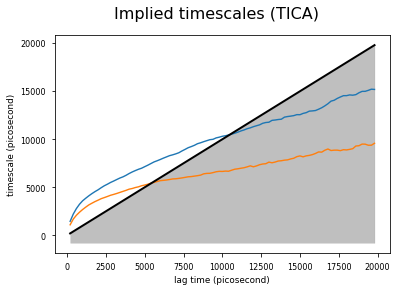

In [8]:
exp_NVT_340.implied_timescale_analysis(max_lag='20ns', increment=1, yscale='linear')

100%|██████████| 49/49 [00:01<00:00, 46.44it/s]


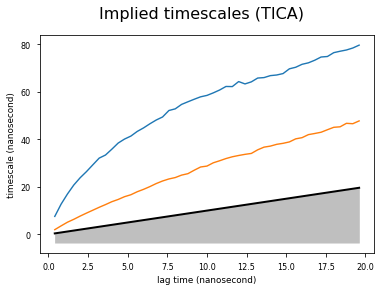

In [7]:
exp_NPT.implied_timescale_analysis(max_lag='20ns', increment=1, yscale='linear')

### Comparing Free Energy Surfaces

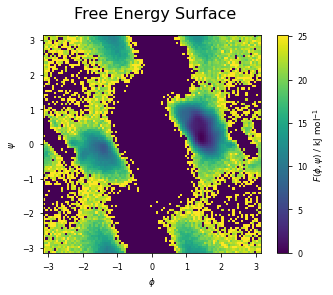

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>)

In [8]:
exp_DESRES.free_energy_plot(features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

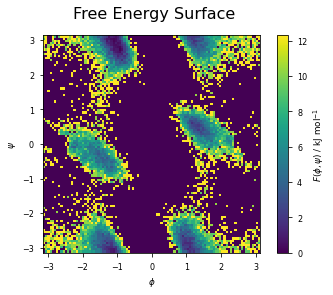

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>)

In [9]:
exp_NVT_340.free_energy_plot(features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

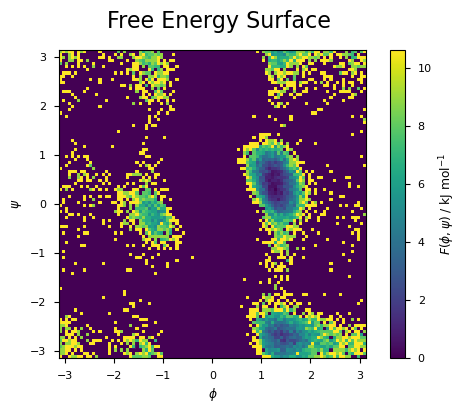

(<Figure size 600x400 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>)

In [16]:
exp_NPT.free_energy_plot(features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

### Comparing Trajectories

In [13]:
exp_DESRES.interact()

NGLWidget(count=534743)

In [14]:
exp_NPT.interact()

NGLWidget(count=12500)

In [4]:
exp_NVT_340.interact()

NGLWidget(count=25000)

In [11]:
exp_70ns_NPT_800K.interact()

NGLWidget(count=6999)

### Comparing Contacts and Timeseries

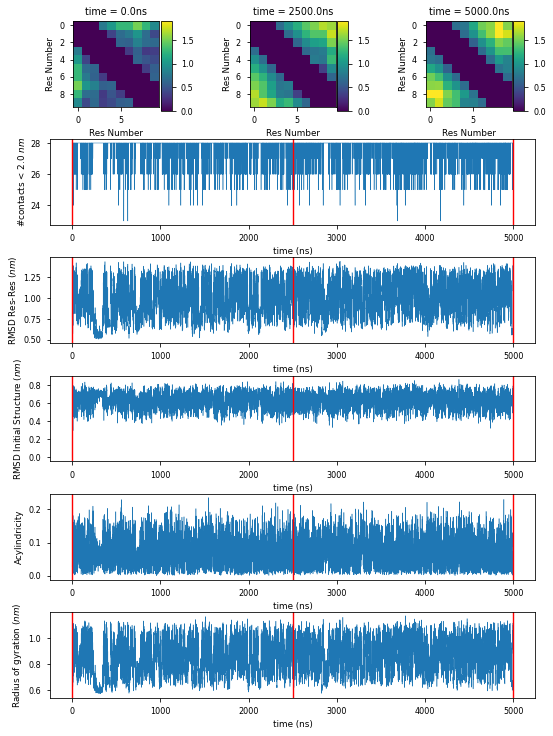

In [5]:
exp_NVT_340.timeseries_analysis()

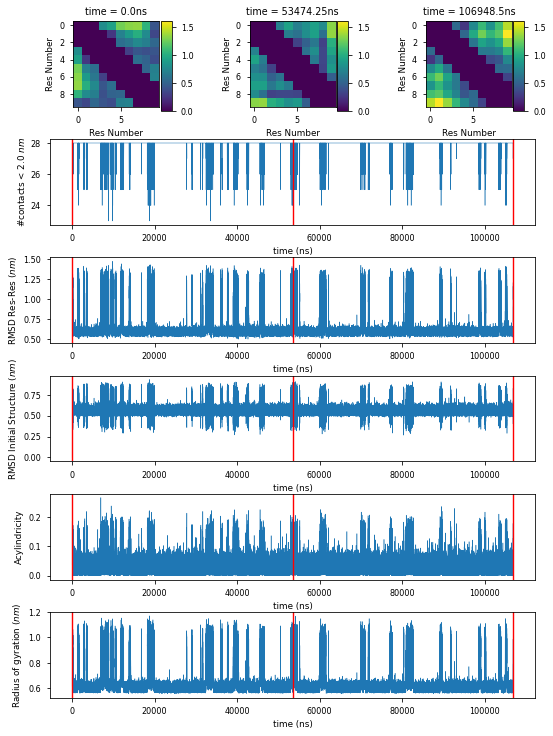

In [9]:
exp_DESRES.timeseries_analysis()

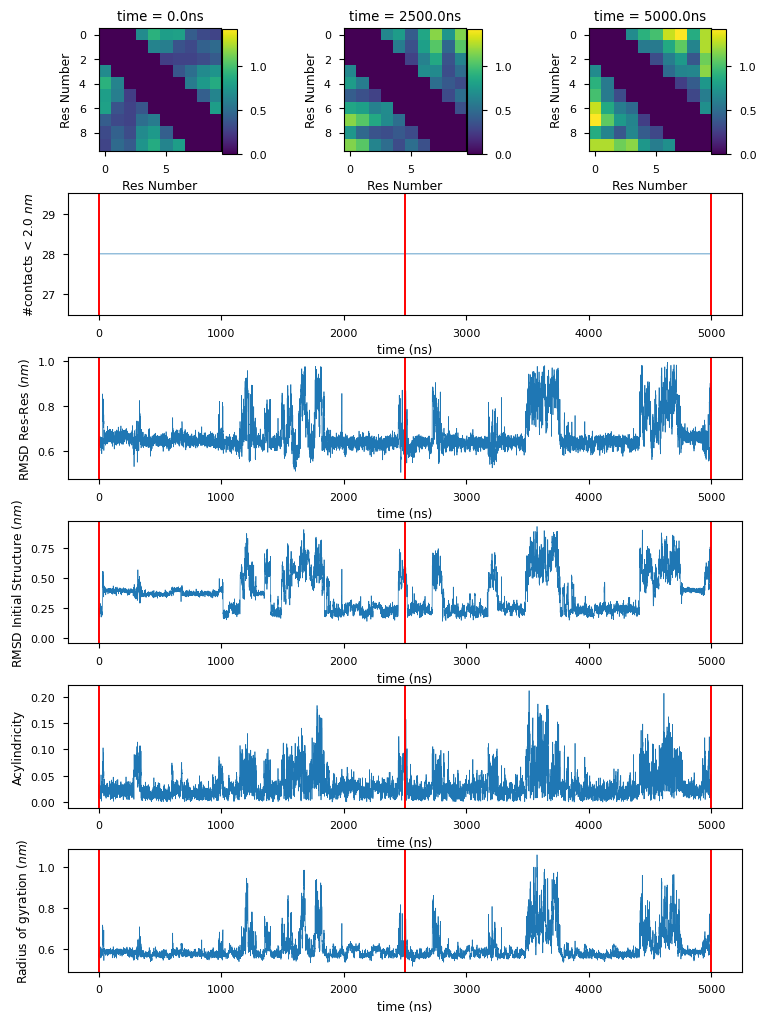

In [21]:
exp_NPT.timeseries_analysis()

### Markov State Model Analysis

KMeans iterations: 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]  


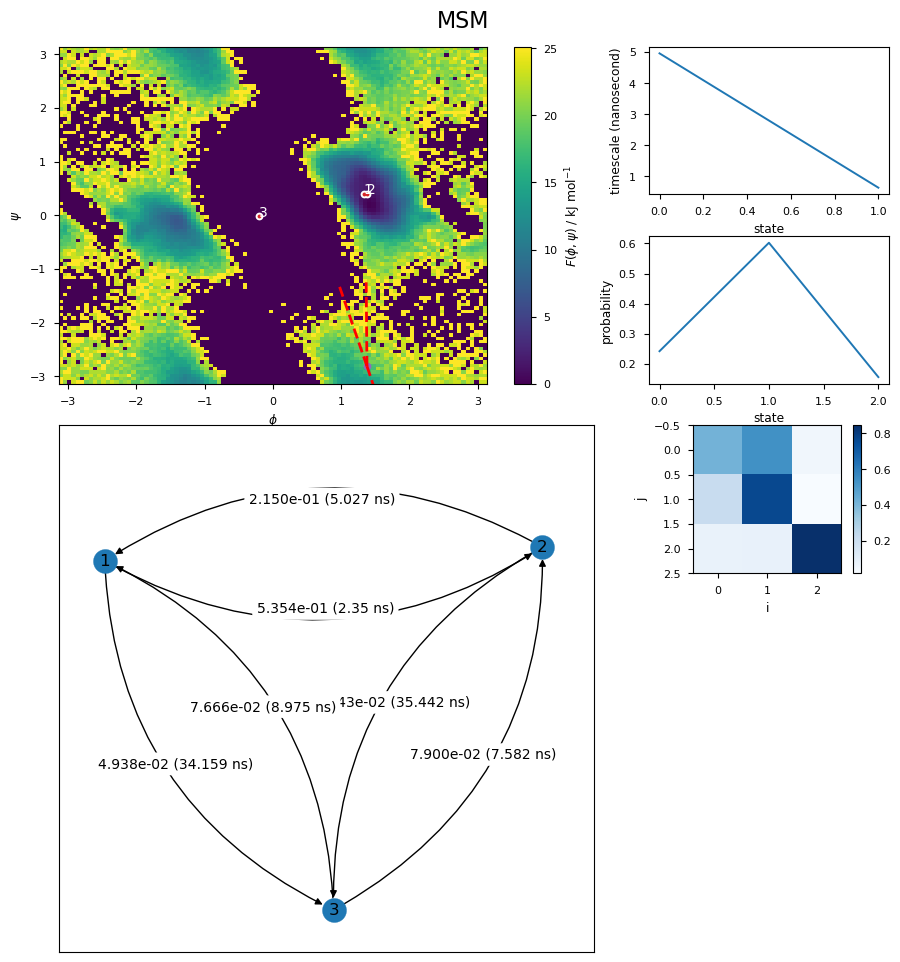

In [26]:
exp_DESRES.markov_state_model(n_clusters=3, lagtime='1ns', features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

KMeans iterations: 100%|██████████| 3/3 [00:00<00:00, 192.79it/s]


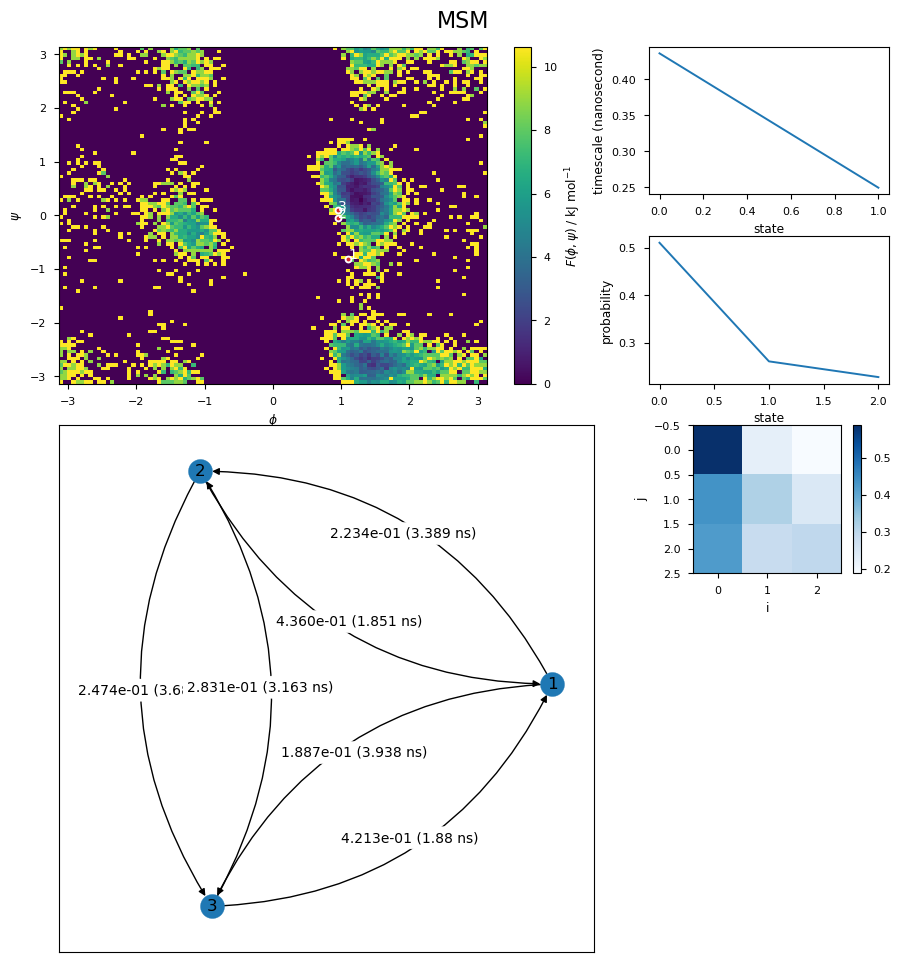

In [27]:
exp_NPT.markov_state_model(n_clusters=3, lagtime='1ns', features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

## 5us NPT Trajectory

In [10]:
exp_NPT.interact()

NGLWidget(count=12500)

100%|██████████| 49/49 [00:00<00:00, 376.83it/s]


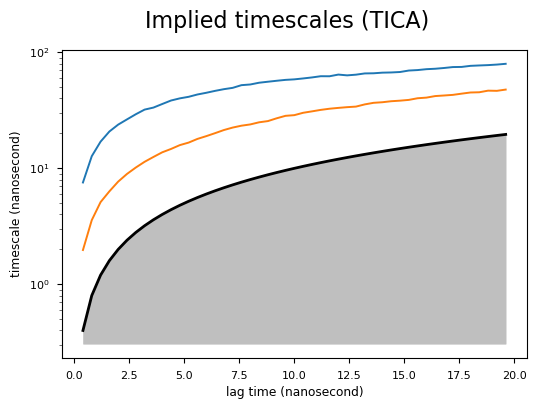

In [11]:
exp_NPT.implied_timescale_analysis(max_lag='20ns', increment=1)

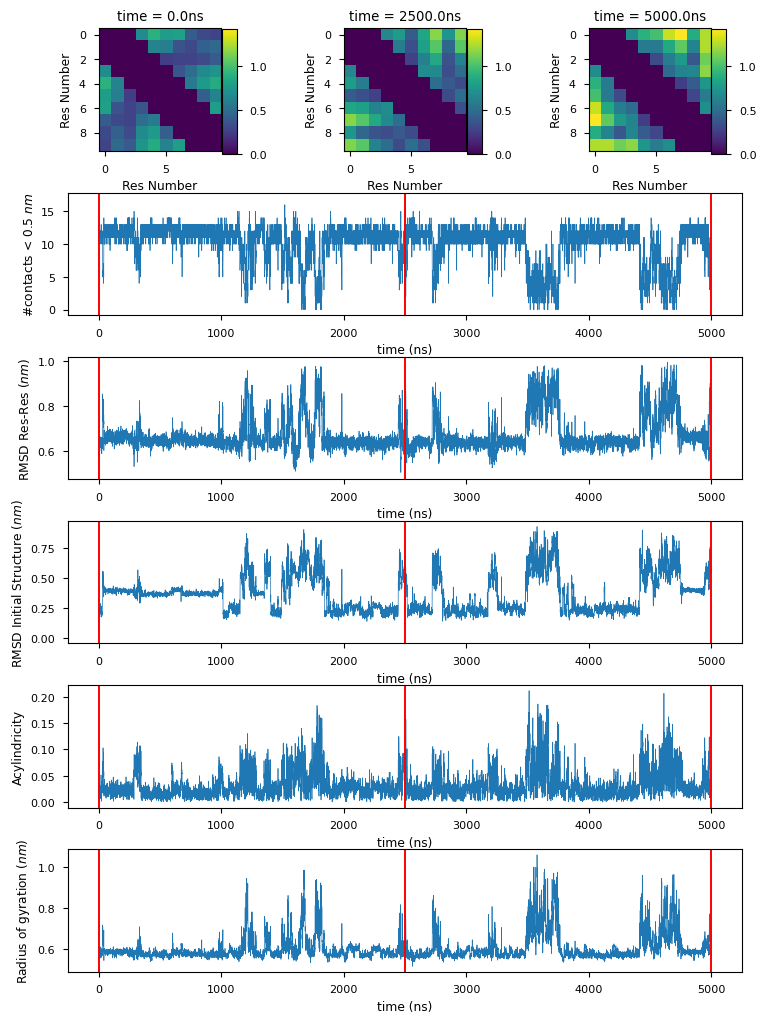

In [12]:
exp_NPT.timeseries_analysis(contact_threshold=contact_threshold, times=times)

KMeans iterations: 100%|██████████| 3/3 [00:00<00:00, 222.58it/s]


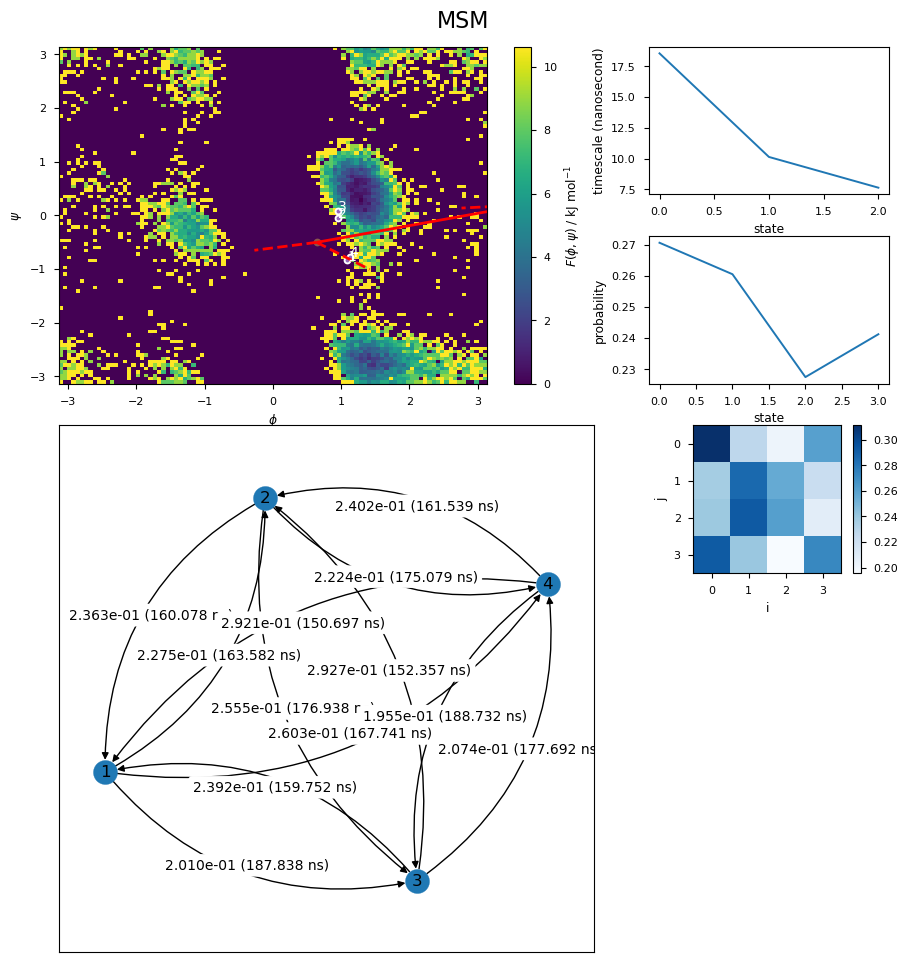

In [13]:
exp_NPT.markov_state_model(n_clusters=4, lagtime='40ns', features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])

In [14]:
exp_NPT.implied_timescale_analysis(max_lag=1000, increment=1, yscale='linear')

AssertionError: Max_lag must be a string (e.g. `10ns').

# Deca Alanine

System information:
- 10 identical alanine residues, capped at both ends.
- Acyetyl group at the N terminus, and methylamaine group at the C terminus. 
- System size: 112 atoms, 2520 water molecules.

Notes on experiments:
- **deca_NVT**: A 5us standard conditions NVT simulation (300K). The initial structure was a an "open configuration" of deca alanine, acquired by running a 800K NVT vacuum simulation of the structure and extracting the structure after 1ns of simulation time.


In [7]:
exp_deca_NVT = Experiment(location='../exp/outputs/deca_alanine/5us_NVT_deca_alanine_structure0', features=['dihedrals'])

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 20 features.


In [10]:
exp_deca_NPT = Experiment(location='../exp/outputs/deca_alanine/5us_NPT_deca_alanine', features=['dihedrals'])

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 20 features.


In [8]:
exp_deca_NVT.interact()

NGLWidget(count=12500)

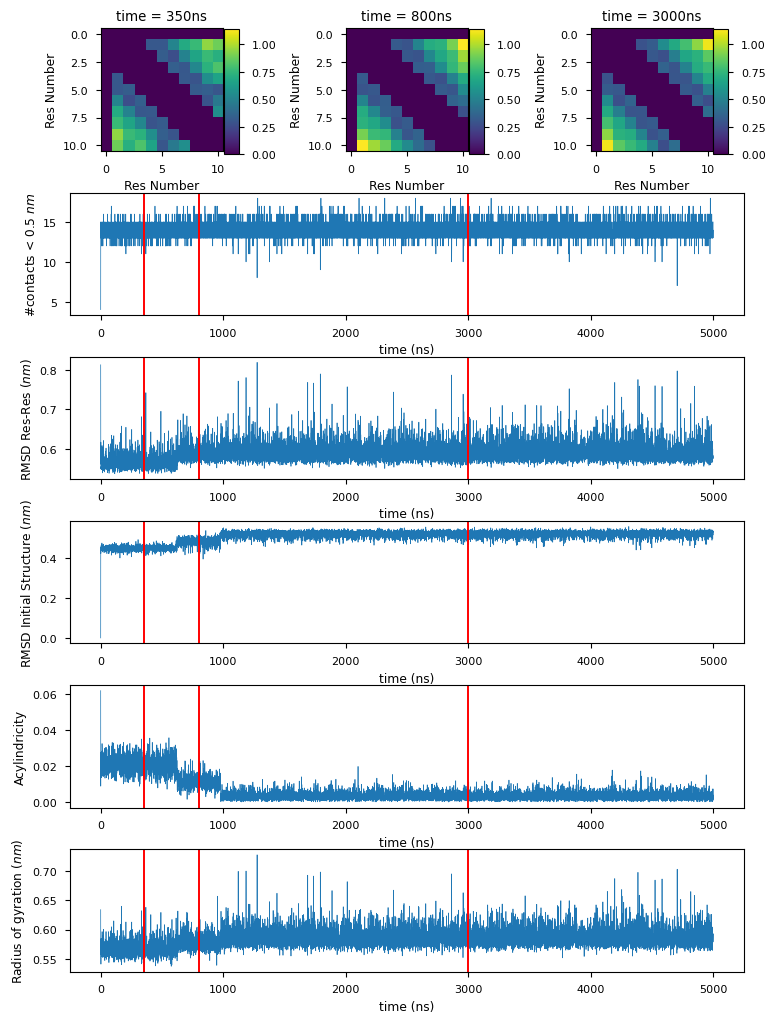

In [46]:
exp_deca_NVT.timeseries_analysis(contact_threshold=0.5, times=['350ns', '800ns', '3000ns'])

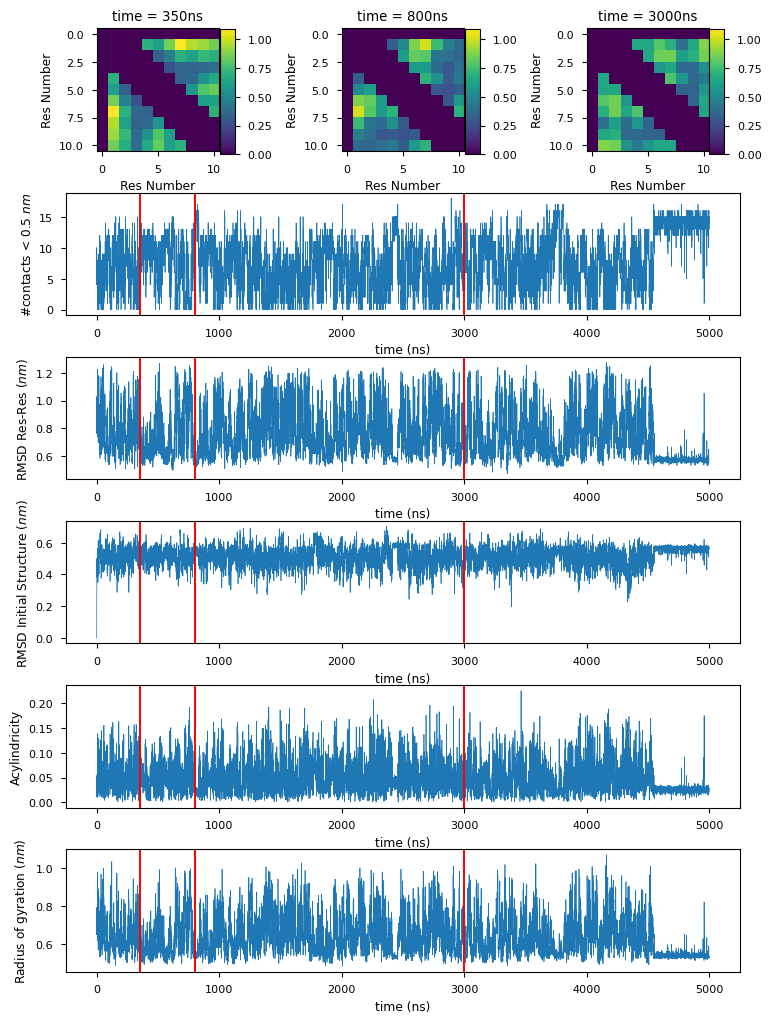

In [48]:
exp_deca_NPT.timeseries_analysis(contact_threshold=0.5, times=['350ns', '800ns', '3000ns'])

In [11]:
exp_deca_NPT.interact()

NGLWidget(count=12501)